In [ ]:
!workon cv
!pip install numpy
!pip install cython
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt
import cv2

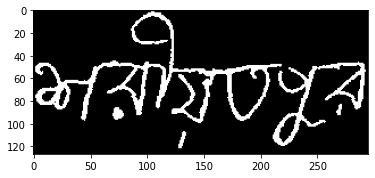

In [ ]:
image = cv2.imread("pic2.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(image, cmap="gray")

In [ ]:
def threshold_slow(T, image):
    # grab the image dimensions
    h = image.shape[0]
    w = image.shape[1]
    
    # loop over the image, pixel by pixel
    for y in range(0, h):
        for x in range(0, w):
            # threshold the pixel
            if image[y,x] >= T:
              image[y, x] = 255
            else:
              image[y,x] = 0
            
    # return the thresholded image
    return image

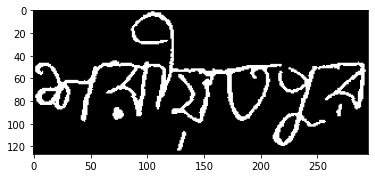

In [ ]:
image = threshold_slow(5, image)
plt.imshow(image, cmap="gray")

In [ ]:
# find matra row
R = image.shape[0]
C = image.shape[1]
matra_row = 0
sofar = 0;
for r in range(0, R):
  cnt = 0
  for c in range(0, C):
    if image[r,c] == 255:
      cnt+=1
  if cnt>sofar:
    sofar = cnt;
    matra_row = r;   

print(matra_row)     


49


In [ ]:
#killing matra
l = matra_row-10
r = matra_row+10
for i in range(l,r):
  for j in range(0,c):
    image[i,j] = 0

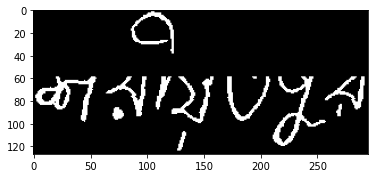

In [ ]:
plt.imshow(image, cmap="gray")

In [ ]:
print(R)
print(C)

127
295


In [ ]:
# getting rid of everything upper of metra
for i in range(0,matra_row-5):
  for j in range(0,C):
    image[i,j] = 0;

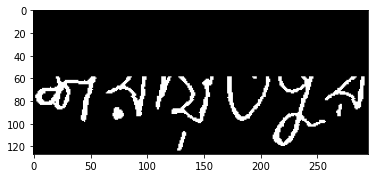

In [ ]:
plt.imshow(image, cmap="gray")

In [ ]:
image = image[matra_row:R, 0:C]

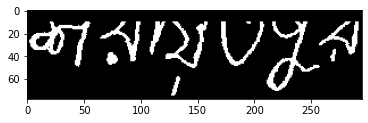

In [ ]:
plt.imshow(image, cmap="gray")

In [ ]:
cut = []
R = image.shape[0]
C = image.shape[1]
lst = -1
for j in range(C):
  cnt = 0
  for i in range(R):
    if image[i,j] == 0:
      cnt+=1
  if cnt == R:
    if lst == 1:
      cut.append(j)
  if cnt == R:
    lst = -1
  else:
    lst = 1  


In [ ]:
print(cut)

[56, 100, 159, 209, 292]


In [ ]:
last_col = 0
output = []
for c in cut:
  output.append(image[0:R, last_col:c])
  last_col = c

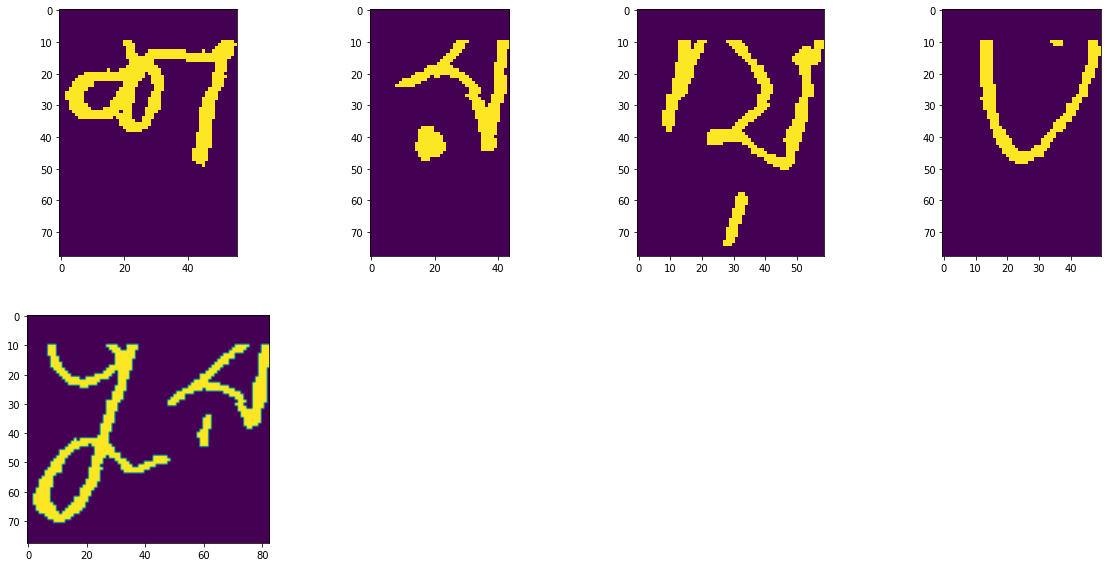

In [ ]:
plt.figure(figsize=(20,10))
columns = 4

for i, image in enumerate(output):
    plt.subplot(len(output) / columns + 1, columns, i + 1)
    plt.imshow(image)